<a href="https://colab.research.google.com/github/aakarshbalpande/Stock-price-predication-Model/blob/main/Stock_price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2024-01-02  248.419998  251.250000  244.410004  250.080002  104654200
2024-01-03  238.449997  245.679993  236.320007  244.979996  121082600
2024-01-04  237.929993  242.699997  237.729996  239.250000  102629300
2024-01-05  237.490005  240.119995  234.899994  236.860001   92379400
2024-01-08  240.449997  241.250000  235.300003  236.139999   85166600
Price            Close        High         Low        Open    Volume
Ticker            TSLA        TSLA        TSLA        TSLA      TSLA
Date                                                                
2024-12-24  462.279999  462.779999  435.140015  435.899994  59551800
2024-12-26  454.130005  465.329987  451.019989  465.160004  76366400
2024-12-27  431.660004  450.000000  426.500000  449.519989  82666800
2024-12-30  417.410004  42

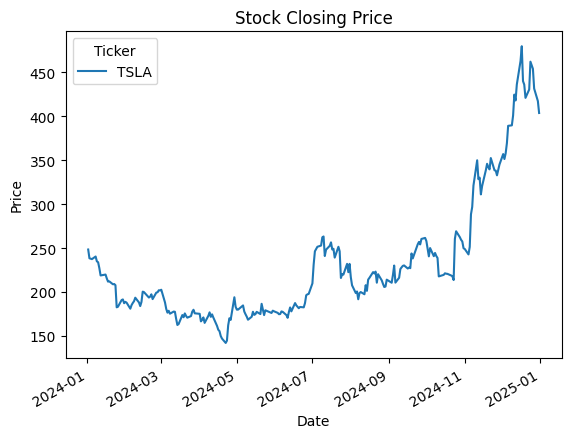

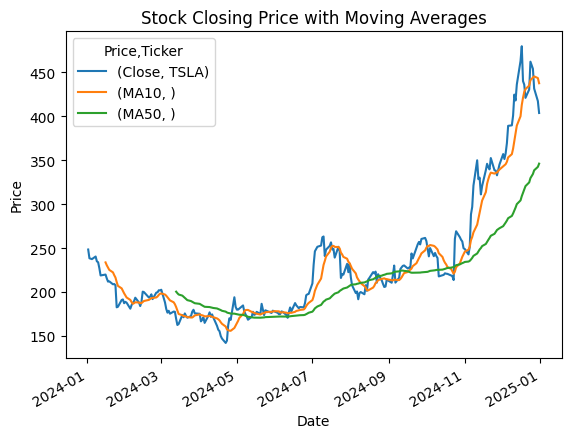

MAE(Mean abssulate error): 4.078315251472549
RMSE(Root mean square error): 5.379164306734466


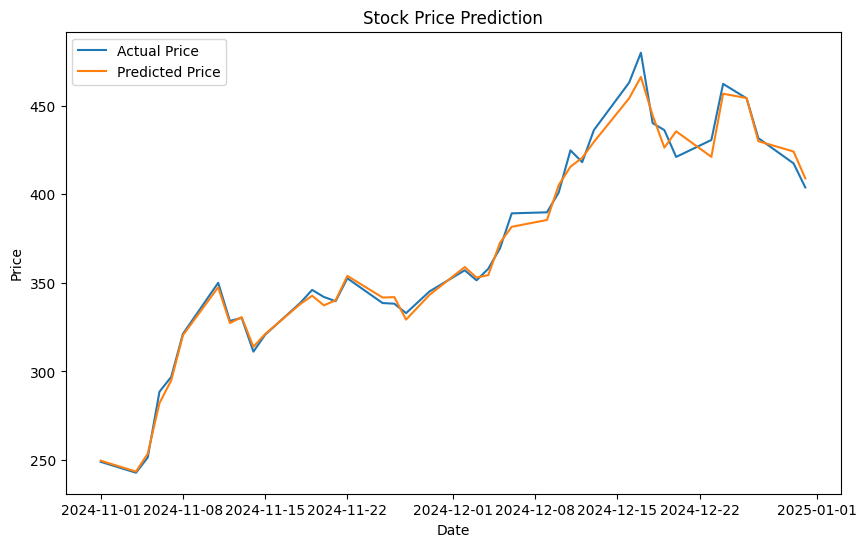

In [ ]:
import yfinance as yf

# Download historical data for a stock, eg Tesla
data = yf.download('TSLA', start='2024-01-01', end='2025-01-01', progress=False)

print(data.head())
print(data.tail())

import matplotlib.pyplot as plt
data['Close'].plot(title= 'Stock Closing Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

data[['Close', 'MA10', 'MA50']].plot(title='Stock Closing Price with Moving Averages')
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
data['Prev_Close'] = data['Close'].shift(1)
data = data.dropna()

from sklearn.model_selection import train_test_split
X = data[['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'Prev_Close']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y_pred = model.predict(X_test)
print("MAE(Mean abssulate error):", mean_absolute_error(y_test, y_pred))
print("RMSE(Root mean square error):", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

